In [66]:
import os
os.chdir('/Users/apple/DATASCIENCE PROJECTS/PREDICTING Company Profitability')

In [67]:
#load the dataset
import pandas as pd
data=pd.read_csv('1000_Companies.csv')

In [68]:
#Use the head() method to display the first few rows of the DataFrame
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [69]:
# Display a concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [70]:
# Generate descriptive statistics
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [71]:
#visualization of R&D Spend and Profit
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
figure=px.scatter(data, x='R&D Spend', y='Profit', title='Relationship R&D Spend and Profit')
figure.update_layout(xaxis_title='R&D Spend[USD]', yaxis_title='Profit[USD]')
figure.show()

In [72]:
#visualization of Administration and Profit
figure=px.scatter(data, x='Administration', y='Profit', title='Relationship Administration and Profit')
figure.update_layout(xaxis_title='Administration[USD]', yaxis_title='Profit[USD]')
figure.show()

In [73]:
#visualization of Marketing Spend and Profit
figure=px.scatter(data, x='Marketing Spend', y='Profit', title='Relationship Marketing Spend and Profit')
figure.update_layout(xaxis_title='Marketing Spend[USD]', yaxis_title='Profit[USD]')
figure.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



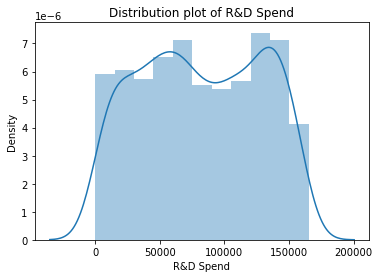

In [74]:
#distribution plot of R&D Spend
sns.distplot(data['R&D Spend'])
plt.title('Distribution plot of R&D Spend');

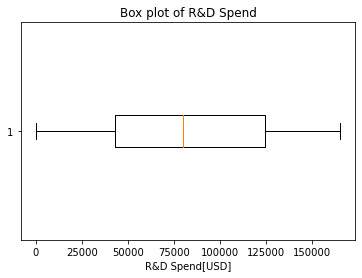

In [75]:
plt.boxplot(data['R&D Spend'], vert=False)
plt.xlabel('R&D Spend[USD]');
plt.title('Box plot of R&D Spend');

In [76]:
numerical_columns=data[['R&D Spend','Administration','Marketing Spend','Profit']]

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



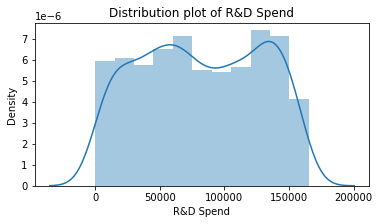

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



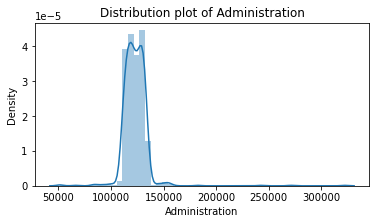

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



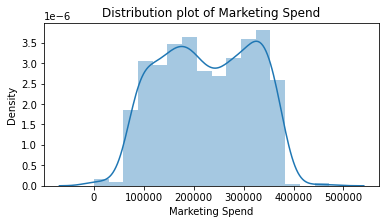

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



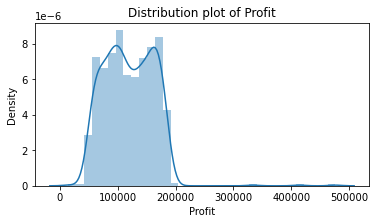

In [77]:
for cols in numerical_columns:
    plt.figure(figsize=(6,3))
    sns.distplot(data[cols])
    plt.title("Distribution plot of {}".format(''.join(cols)))
    plt.show()

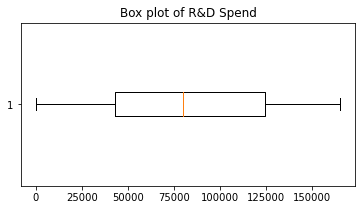

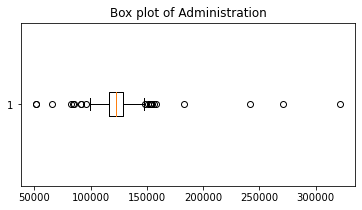

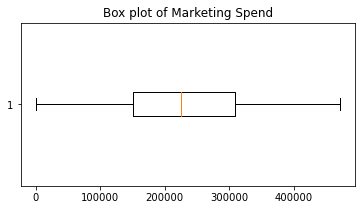

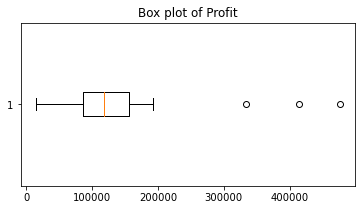

In [78]:
for cols in numerical_columns:
    plt.figure(figsize=(6,3))
    plt.boxplot(data[cols], vert=False)
    plt.title("Box plot of {}".format(''.join(cols)))

**From the boxplot data, it is evident that the administraion  data has outliers**

In [79]:
# Apply log transformation to 'Administration' and 'Profit' variables
data['Administration_log'] = np.log(data['Administration'] + 1)  # Adding 1 to handle zero values
data['Profit_log'] = np.log(data['Profit'] + 1)  # Adding 1 to handle zero values

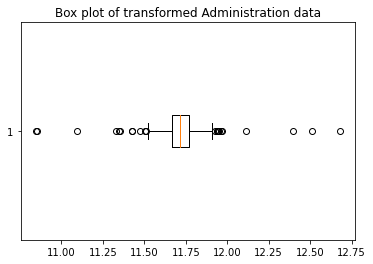

In [80]:
plt.boxplot(data['Administration_log'], vert=False)
plt.title('Box plot of transformed Administration data');

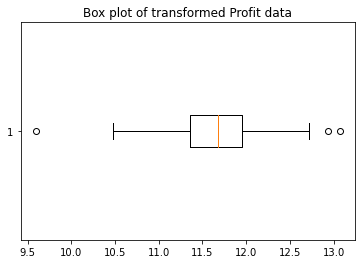

In [81]:
plt.boxplot(data['Profit_log'], vert=False)
plt.title('Box plot of transformed Profit data');

**The transformed administration data stil has some outliers, they could be genuine data points**

In [82]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Administration_log,Profit_log
0,165349.20,136897.80,471784.10,New York,192261.83,11.826997,12.166619
1,162597.70,151377.59,443898.53,California,191792.06,11.927539,12.164172
2,153441.51,101145.55,407934.54,Florida,191050.39,11.524326,12.160298
3,144372.41,118671.85,383199.62,New York,182901.99,11.684126,12.116711
4,142107.34,91391.77,366168.42,Florida,166187.94,11.422922,12.020881


In [83]:
#consistent pattern check
correlation_of_rd_ms=data.corr(method='spearman') 
correlation_of_rd_ms

,R&D Spend,Administration,Marketing Spend,Profit,Administration_log,Profit_log
R&D Spend,1.000000,0.931635,0.982475,0.997928,0.931635,0.997928
Administration,0.931635,1.000000,0.899541,0.931511,1.000000,0.931511
Marketing Spend,0.982475,0.899541,1.000000,0.982109,0.899541,0.982109
Profit,0.997928,0.931511,0.982109,1.000000,0.931511,1.000000
Administration_log,0.931635,1.000000,0.899541,0.931511,1.000000,0.931511
Profit_log,0.997928,0.931511,0.982109,1.000000,0.931511,1.000000


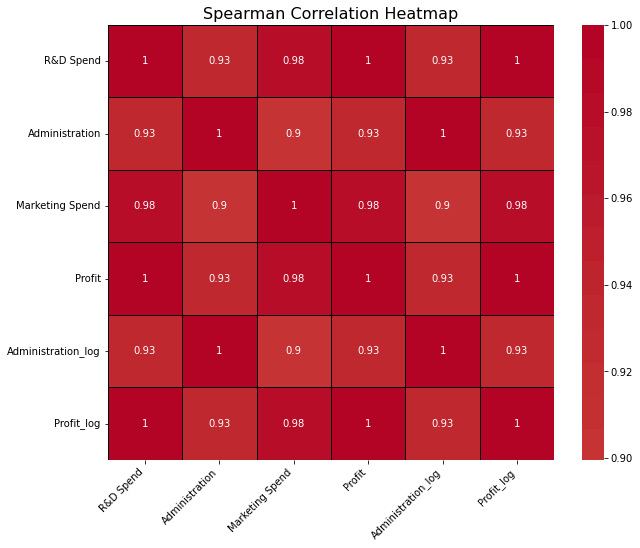

In [84]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_of_rd_ms, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black')

# Add title and labels
plt.title('Spearman Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Display the heatmap
plt.show()

Theres perfect positive relationship between variables

In [85]:
correlation_of_rd=data.corr(method='pearson') #linearity check
correlation_of_rd

,R&D Spend,Administration,Marketing Spend,Profit,Administration_log,Profit_log
R&D Spend,1.000000,0.582434,0.978407,0.945245,0.643670,0.969452
Administration,0.582434,1.000000,0.520465,0.741560,0.958140,0.646097
Marketing Spend,0.978407,0.520465,1.000000,0.917270,0.583539,0.947521
Profit,0.945245,0.741560,0.917270,1.000000,0.741542,0.963922
Administration_log,0.643670,0.958140,0.583539,0.741542,1.000000,0.685756
Profit_log,0.969452,0.646097,0.947521,0.963922,0.685756,1.000000


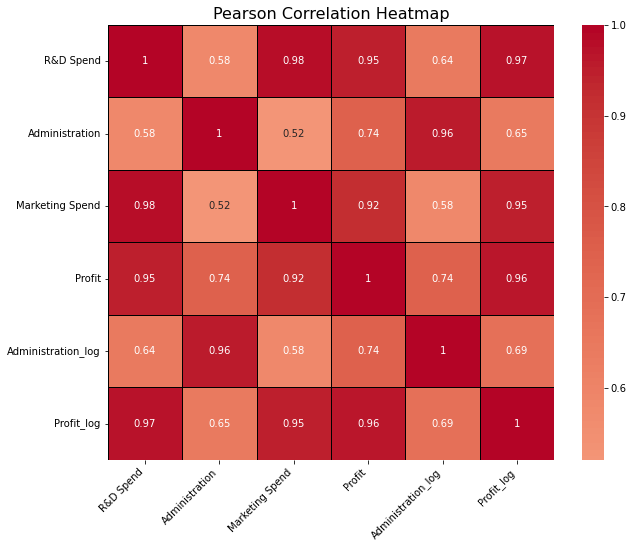

In [87]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_of_rd, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black')

# Add title and labels
plt.title('Pearson Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Display the heatmap
plt.show()

∣r∣=0.40−0.59: Moderate correlation
∣r∣=0.60−0.79: Strong correlation
∣r∣=0.80−1.00: Very strong correlation

In [23]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit',
       'Administration_quantile_transformed', 'Administration_lo',
       'Profit_log', 'Administration_log'],
      dtype='object')

In [92]:
x=data[['R&D Spend', 'Administration', 'Marketing Spend']]
y=data['Profit']

In [94]:
import statsmodels.api as sm
x1=sm.add_constant(x)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          4.394e+04
Date:                Wed, 22 May 2024   Prob (F-statistic):                        0.00
Time:                        13:34:44   Log-Likelihood:                         -10725.
No. Observations:                1000   AIC:                                  2.146e+04
Df Residuals:                     997   BIC:                                  2.147e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.9331      0.031     29.752      0.000       0.872       0.995
Administration      0.5063      0.011     44.532      0.000       0.484       0.529
Marketing Spend    -0.0818      0.016     -5.064      0.000      -0.113      -0.050
==============================================================================
Omnibus:                     2001.556   Durbin-Watson:                   0.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3646556.441
Skew:                          15.211   Prob(JB):                         0.00
Kurtosis:                     297.265   Cond. No.                         29.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All p-values are less than 0.05, this indicates that the observed correlation is statistically significant

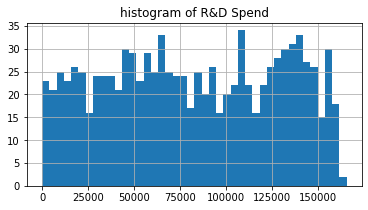

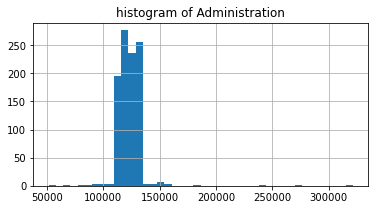

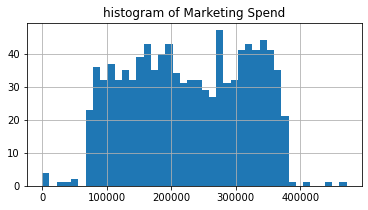

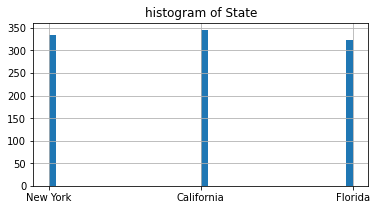

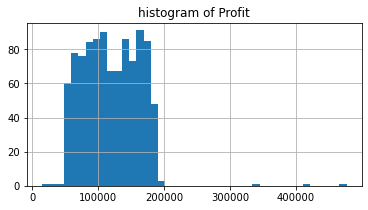

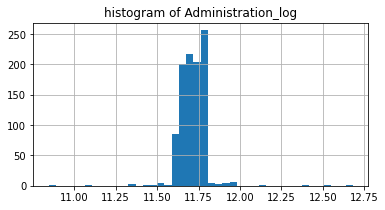

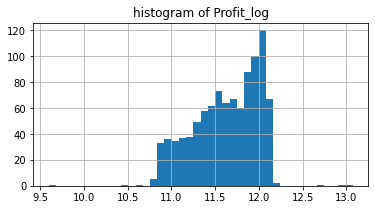

In [95]:
for cols in data:
    plt.figure(figsize=(6,3))
    data[cols].hist(bins=42)
    plt.title("histogram of {}".format(''.join(cols)))
    plt.show()

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

In [97]:
import time
lr=LinearRegression()
dt=DecisionTreeRegressor()
kn=KNeighborsRegressor()
rf=RandomForestRegressor()
svr=SVR()
xgb=xgb.XGBRegressor()
mlp=MLPRegressor(hidden_layer_sizes=(64,32), activation='relu',
                 max_iter=1000, random_state=42)

In [98]:
classifiers = {'Linear Regression':lr, 'DecisionTree':dt, 'RandomForest':rf, 'MLP':mlp, 'SupportVector': svr, 'XGBoost': xgb}

In [99]:
x=data.drop(['Profit','State'], axis=1)
y=data['Profit']

In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

Regressor: Linear Regression
R-squared: 0.8849866646482115
Mean Absolute Error: 2816.6087291319423
Time taken: 0.0026941299438476562 seconds


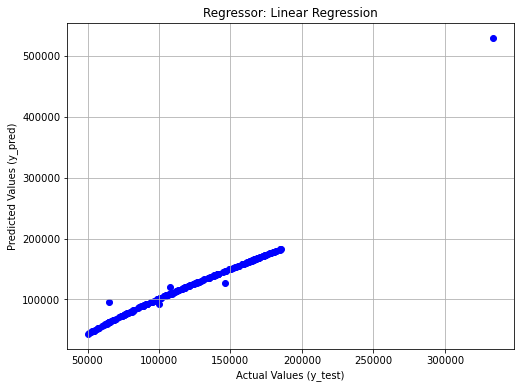

-----------------------------------------
Regressor: DecisionTree
R-squared: 0.9423155803979703
Mean Absolute Error: 822.3256961999989
Time taken: 0.006546974182128906 seconds


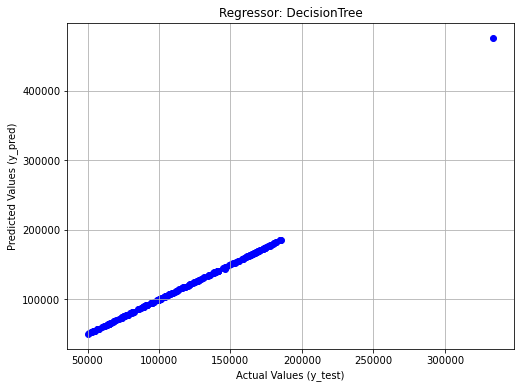

-----------------------------------------
Regressor: RandomForest
R-squared: 0.9911922648688082
Mean Absolute Error: 377.234870041499
Time taken: 0.31728672981262207 seconds


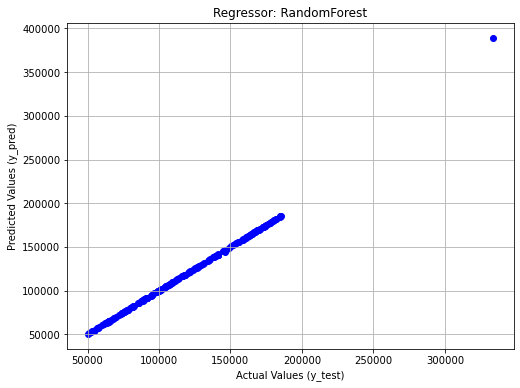

-----------------------------------------
Regressor: MLP
R-squared: 0.9462261037256653
Mean Absolute Error: 1394.7935544029287
Time taken: 3.6834280490875244 seconds


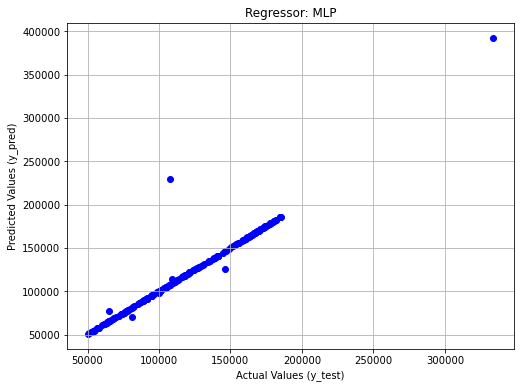

-----------------------------------------
Regressor: SupportVector
R-squared: 0.007294690769123702
Mean Absolute Error: 34838.30757195061
Time taken: 0.06341719627380371 seconds


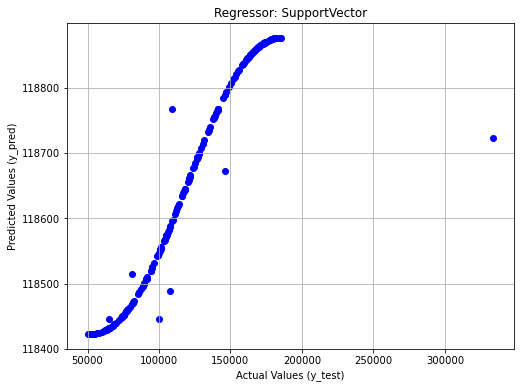

-----------------------------------------
Regressor: XGBoost
R-squared: 0.9431746126142454
Mean Absolute Error: 963.8603035500003
Time taken: 0.17070913314819336 seconds


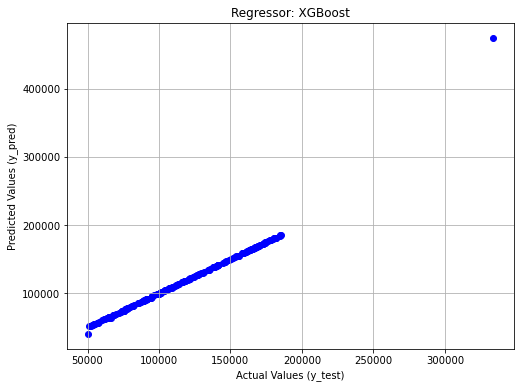

-----------------------------------------


In [101]:
for name, clf in classifiers.items():
    start_time=time.time()
    clf.fit(x_train,y_train)
    end_time=time.time()
    y_pred=clf.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"Regressor: {name}")
    print(f"R-squared: {r2}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Time taken: {end_time - start_time} seconds")
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.title(f"Regressor: {name}")
    plt.xlabel("Actual Values (y_test)")
    plt.ylabel("Predicted Values (y_pred)")
    plt.grid(True)
    plt.show()
    print("-----------------------------------------")

**Summary**


**The RandomForest regressor stands out as the best overall performer with the highest  R-Squared and lowest MAE, making it highly accurate for predicting profits in this case. The DecisionTree regressor also performs excellently, balancing high accuracy with extremely efficient computation time**